<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_3_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.2_n20.csv',
 'data_add_delta_-3.2_n30.csv',
 'data_add_delta_-3.2_n60.csv',
 'data_add_delta_-3.2_n120.csv',
 'data_add_delta_-3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.046834,53.992629,71.416453,1.635228e-06,206.455919,206.455914,4.229088e-06
1,0.0,1.0,86.373185,84.033834,50.793120,-1.115808e-06,231.200138,231.200140,-1.473996e-06
2,0.0,2.0,64.051286,57.142414,61.421474,-1.917339e-06,192.615173,192.615172,5.086112e-07
3,0.0,3.0,98.584403,67.239196,60.728962,-4.778024e-07,236.552562,236.552561,5.014369e-07
4,0.0,4.0,71.933493,67.422760,28.278807,-7.449352e-07,177.635060,177.635059,6.678416e-07
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,63.795482,52.817467,44.006810,1.781904e-07,170.619758,170.619755,3.186413e-06
19996,999.0,16.0,66.222121,84.628573,94.227960,-1.276764e-06,255.078652,255.078654,-1.917462e-06
19997,999.0,17.0,86.416127,23.941319,40.538259,-2.171615e-05,160.895683,160.895703,-1.930136e-05
19998,999.0,18.0,39.911277,52.547777,85.979677,2.292001e-06,188.438734,188.438731,3.641811e-06


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.046834,53.992629,71.416453,1.635228e-06,206.455919,206.455914,4.229088e-06
1,0.0,1.0,86.373185,84.033834,50.793120,-1.115808e-06,231.200138,231.200140,-1.473996e-06
2,0.0,2.0,64.051286,57.142414,61.421474,-1.917339e-06,192.615173,192.615172,5.086112e-07
3,0.0,3.0,98.584403,67.239196,60.728962,-4.778024e-07,236.552562,236.552561,5.014369e-07
4,0.0,4.0,71.933493,67.422760,28.278807,-7.449352e-07,177.635060,177.635059,6.678416e-07
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,63.795482,52.817467,44.006810,1.781904e-07,170.619758,170.619755,3.186413e-06
19996,999.0,16.0,66.222121,84.628573,94.227960,-1.276764e-06,255.078652,255.078654,-1.917462e-06
19997,999.0,17.0,86.416127,23.941319,40.538259,-2.171615e-05,160.895683,160.895703,-1.930136e-05
19998,999.0,18.0,39.911277,52.547777,85.979677,2.292001e-06,188.438734,188.438731,3.641811e-06


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    71.046834  53.992629  ...  206.455914  4.229088e-06
      1.0    86.373185  84.033834  ...  231.200140 -1.473996e-06
      2.0    64.051286  57.142414  ...  192.615172  5.086112e-07
      3.0    98.584403  67.239196  ...  236.552561  5.014369e-07
      4.0    71.933493  67.422760  ...  177.635059  6.678416e-07
...                ...        ...  ...         ...           ...
999.0 15.0   63.795482  52.817467  ...  170.619755  3.186413e-06
      16.0   66.222121  84.628573  ...  255.078654 -1.917462e-06
      17.0   86.416127  23.941319  ...  160.895703 -1.930136e-05
      18.0   39.911277  52.547777  ...  188.438731  3.641811e-06
      19.0   56.484124  59.479029  ...  213.041943 -1.120928e-07

[20000 rows x 7 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    71.046834  53.992629  ...  206.455914  4.229088e-06
      1.0    86.373185  84.033834  ...  231.200140 -1.473996e-06
      2.0    64.051286  57.142414  ...  192.615172  5.086112e-07
      3.0    98.584403  67.239196  ...  236.552561  5.014369e-07
      4.0    71.933493  67.422760  ...  177.635059  6.678416e-07
...                ...        ...  ...         ...           ...
999.0 15.0   63.795482  52.817467  ...  170.619755  3.186413e-06
      16.0   66.222121  84.628573  ...  255.078654 -1.917462e-06
      17.0   86.416127  23.941319  ...  160.895703 -1.930136e-05
      18.0   39.911277  52.547777  ...  188.438731  3.641811e-06
      19.0   56.484124  59.479029  ...  213.041943 -1.120928e-07

[20000 rows x 7 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.046834,53.992629,71.416453,1.635228e-06,206.455919,206.455914,4.229088e-06
1,0.0,1.0,86.373185,84.033834,50.793120,-1.115808e-06,231.200138,231.200140,-1.473996e-06
2,0.0,2.0,64.051286,57.142414,61.421474,-1.917339e-06,192.615173,192.615172,5.086112e-07
3,0.0,3.0,98.584403,67.239196,60.728962,-4.778024e-07,236.552562,236.552561,5.014369e-07
4,0.0,4.0,71.933493,67.422760,28.278807,-7.449352e-07,177.635060,177.635059,6.678416e-07
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,63.795482,52.817467,44.006810,1.781904e-07,170.619758,170.619755,3.186413e-06
19996,999.0,16.0,66.222121,84.628573,94.227960,-1.276764e-06,255.078652,255.078654,-1.917462e-06
19997,999.0,17.0,86.416127,23.941319,40.538259,-2.171615e-05,160.895683,160.895703,-1.930136e-05
19998,999.0,18.0,39.911277,52.547777,85.979677,2.292001e-06,188.438734,188.438731,3.641811e-06


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    71.046834  53.992629  ...  206.455914  4.229088e-06
      1.0    86.373185  84.033834  ...  231.200140 -1.473996e-06
      2.0    64.051286  57.142414  ...  192.615172  5.086112e-07
      3.0    98.584403  67.239196  ...  236.552561  5.014369e-07
      4.0    71.933493  67.422760  ...  177.635059  6.678416e-07
...                ...        ...  ...         ...           ...
999.0 15.0   63.795482  52.817467  ...  170.619755  3.186413e-06
      16.0   66.222121  84.628573  ...  255.078654 -1.917462e-06
      17.0   86.416127  23.941319  ...  160.895703 -1.930136e-05
      18.0   39.911277  52.547777  ...  188.438731  3.641811e-06
      19.0   56.484124  59.479029  ...  213.041943 -1.120928e-07

[20000 rows x 7 columns]

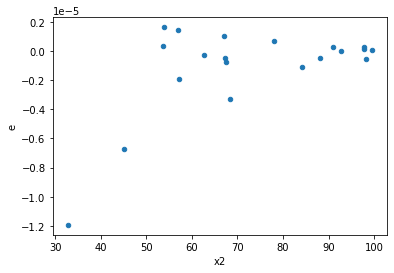

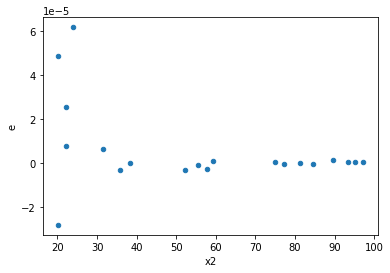

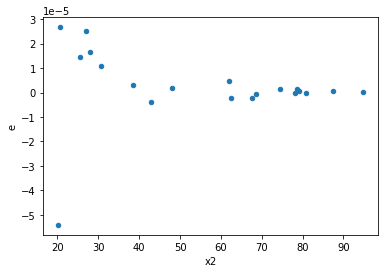

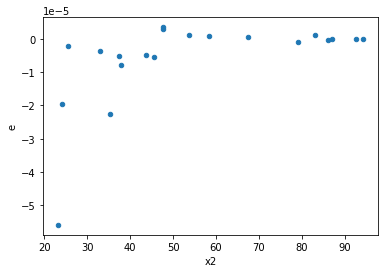

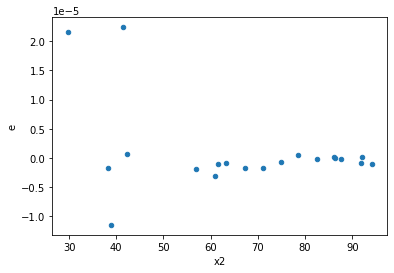

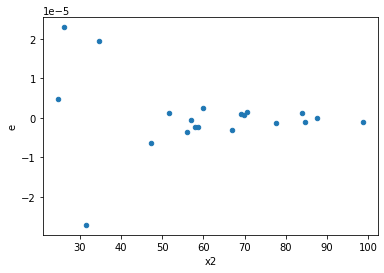

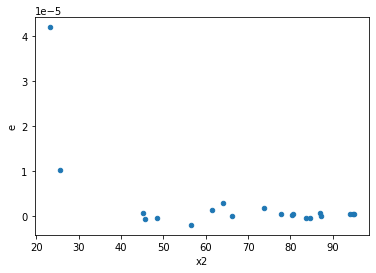

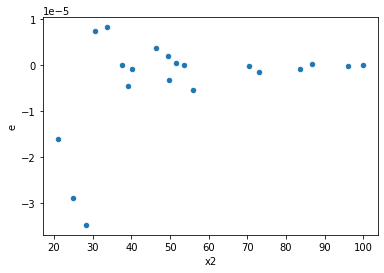

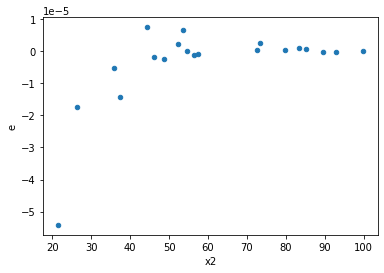

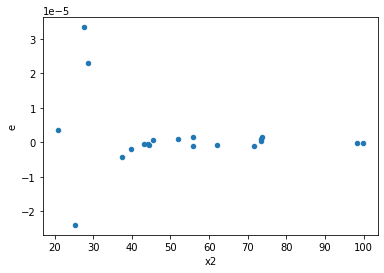

In [13]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,8.778665071033067e-13,1.0428159242951631e-11,2.1946662677582666e-13,2.607039810737908e-12,0.08418230740930184,0.01675731778508199,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,1.5958765161957794e-12,3.4691693697161495e-09,3.9896912904894486e-13,8.672923424290374e-10,0.0004600168934174452,4.923228022368533e-08,Reject001=0 : Heteroscedasticity
2.0,5.0,5.0,3.717473579367311e-12,3.327522178051719e-09,9.293683948418277e-13,8.318805445129298e-10,0.0011171897226974787,4.514549291503095e-07,Reject001=0 : Heteroscedasticity
3.0,5.0,5.0,3.517282360294994e-13,1.20974374022023e-09,8.793205900737485e-14,3.024359350550575e-10,0.00029074606822554705,1.5644531604738797e-08,Reject001=0 : Heteroscedasticity
4.0,5.0,5.0,4.773949303065016e-13,7.676992865529968e-10,1.193487325766254e-13,1.919248216382492e-10,0.0006218514705803956,1.0453971168640774e-07,Reject001=0 : Heteroscedasticity
5.0,5.0,5.0,4.4469771381525155e-12,1.0294526701945426e-09,1.1117442845381289e-12,2.5736316754863566e-10,0.004319748995660132,1.312171978676366e-05,Reject001=0 : Heteroscedasticity
6.0,5.0,5.0,4.582877119492148e-13,6.843782956713525e-10,1.145719279873037e-13,1.7109457391783813e-10,0.000669640920595896,1.257753470027096e-07,Reject001=0 : Heteroscedasticity
7.0,5.0,5.0,7.88127520285648e-12,8.821291077088464e-10,1.97031880071412e-12,2.205322769272116e-10,0.008934378351176409,7.941442340123906e-05,Reject001=0 : Heteroscedasticity
8.0,5.0,5.0,3.1837702577383587e-12,4.1240367220111267e-10,7.959425644345897e-13,1.0310091805027817e-10,0.007720033725077409,5.5354509830196797e-05,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    968
Reject001=1 : Homoscedasticity       32
Name: Result_test, dtype: int64